# Analyze and compare all LLMs
---

This notebook loads all Pulse LLMs and compares the best versions of them. 

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
# Path to LLM output folder
outputfolder_path_list = [
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms"
]

In [3]:
model_list = []
#list all models in the output folder
for output_folder in outputfolder_path_list:
    # List all child folders (directories) in the output folder
    child_folders = [
        name for name in os.listdir(output_folder)
        if os.path.isdir(os.path.join(output_folder, name))
    ]
    model_list.extend(child_folders)

In [4]:
best_approach = LLMAnalyzer.find_best_prompting_id(
    outputfolder_path_list[0], model_list, metric="mcc"
)
best_approach

,deepseekr1llama8b,gemini2p5flash,gemma3,gpt4o,llama3p18b,mistral7b
prompting_id,zhu_2024b_zero_shot_preprocessor,zhu_2024a_cot_preprocessor,sarvari_2024_aggregation_preprocessor,sarvari_2024_aggregation_preprocessor,liu_2023_few_shot_preprocessor,zhu_2024b_zero_shot_preprocessor
metric_value,0.098333,0.218429,0.059667,0.165111,0.164889,0.010778
metrics_report_path,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...


In [5]:
df_all_metrics = pd.DataFrame()
for model in best_approach.columns:
    if best_approach[model] is not None:
        metrics_report_path = best_approach[model]["metrics_report_path"]
        prompting_id = best_approach[model]["prompting_id"]
        print(f"Model: {model}, Prompting ID: {prompting_id}")
        
        # Load the metrics report
        df_temp = LLMAnalyzer.load_metrics_report_as_df(metrics_report_path)
        df_all_metrics = pd.concat([df_all_metrics, df_temp])
    else:
        print(f"No valid report found for model: {model}")
df_all_metrics

Model: deepseekr1llama8b, Prompting ID: zhu_2024b_zero_shot_preprocessor
Model: gemini2p5flash, Prompting ID: zhu_2024a_cot_preprocessor
Model: gemma3, Prompting ID: sarvari_2024_aggregation_preprocessor
Model: gpt4o, Prompting ID: sarvari_2024_aggregation_preprocessor
Model: llama3p18b, Prompting ID: liu_2023_few_shot_preprocessor
Model: mistral7b, Prompting ID: zhu_2024b_zero_shot_preprocessor


,model_id,task_id,dataset,run_id,prompting_id,metric_auroc,metric_auprc,metric_normalized_auprc,metric_specificity,metric_f1_score,metric_accuracy,metric_balanced_accuracy,metric_precision,metric_recall,metric_mcc,metric_kappa,metric_minpse
0,DeepseekR1Llama8b,mortality,eicu,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.747,0.126,1.802,0.559,0.222,0.580,0.708,0.128,0.857,0.213,0.114,0.200
1,DeepseekR1Llama8b,mortality,hirid,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.552,0.089,0.810,0.326,0.225,0.380,0.572,0.130,0.818,0.097,0.044,0.140
2,DeepseekR1Llama8b,mortality,miiv,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.741,0.457,3.806,0.477,0.294,0.520,0.655,0.179,0.833,0.203,0.120,0.286
3,DeepseekR1Llama8b,aki,eicu,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.584,0.401,1.295,0.800,0.348,0.646,0.552,0.406,0.305,0.115,0.112,0.402
4,DeepseekR1Llama8b,aki,hirid,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.504,0.198,1.224,0.859,0.208,0.753,0.530,0.216,0.201,0.062,0.062,0.208
5,DeepseekR1Llama8b,aki,miiv,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.577,0.322,1.384,0.838,0.329,0.713,0.570,0.361,0.301,0.149,0.148,0.336
6,DeepseekR1Llama8b,sepsis,eicu,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.514,0.045,0.945,0.553,0.087,0.548,0.500,0.048,0.447,-0.000,-0.000,0.061
7,DeepseekR1Llama8b,sepsis,hirid,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.571,0.112,1.488,0.580,0.164,0.578,0.564,0.096,0.548,0.068,0.041,0.117
8,DeepseekR1Llama8b,sepsis,miiv,20250620_211315,zhu_2024b_zero_shot_preprocessor,0.500,0.023,0.912,0.572,0.040,0.567,0.466,0.021,0.360,-0.022,-0.008,0.028
0,Gemini2p5flash,mortality,eicu,20250624_172337,zhu_2024a_cot_preprocessor,0.762,0.242,3.456,0.817,0.222,0.790,0.623,0.150,0.429,0.157,0.132,0.158


C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


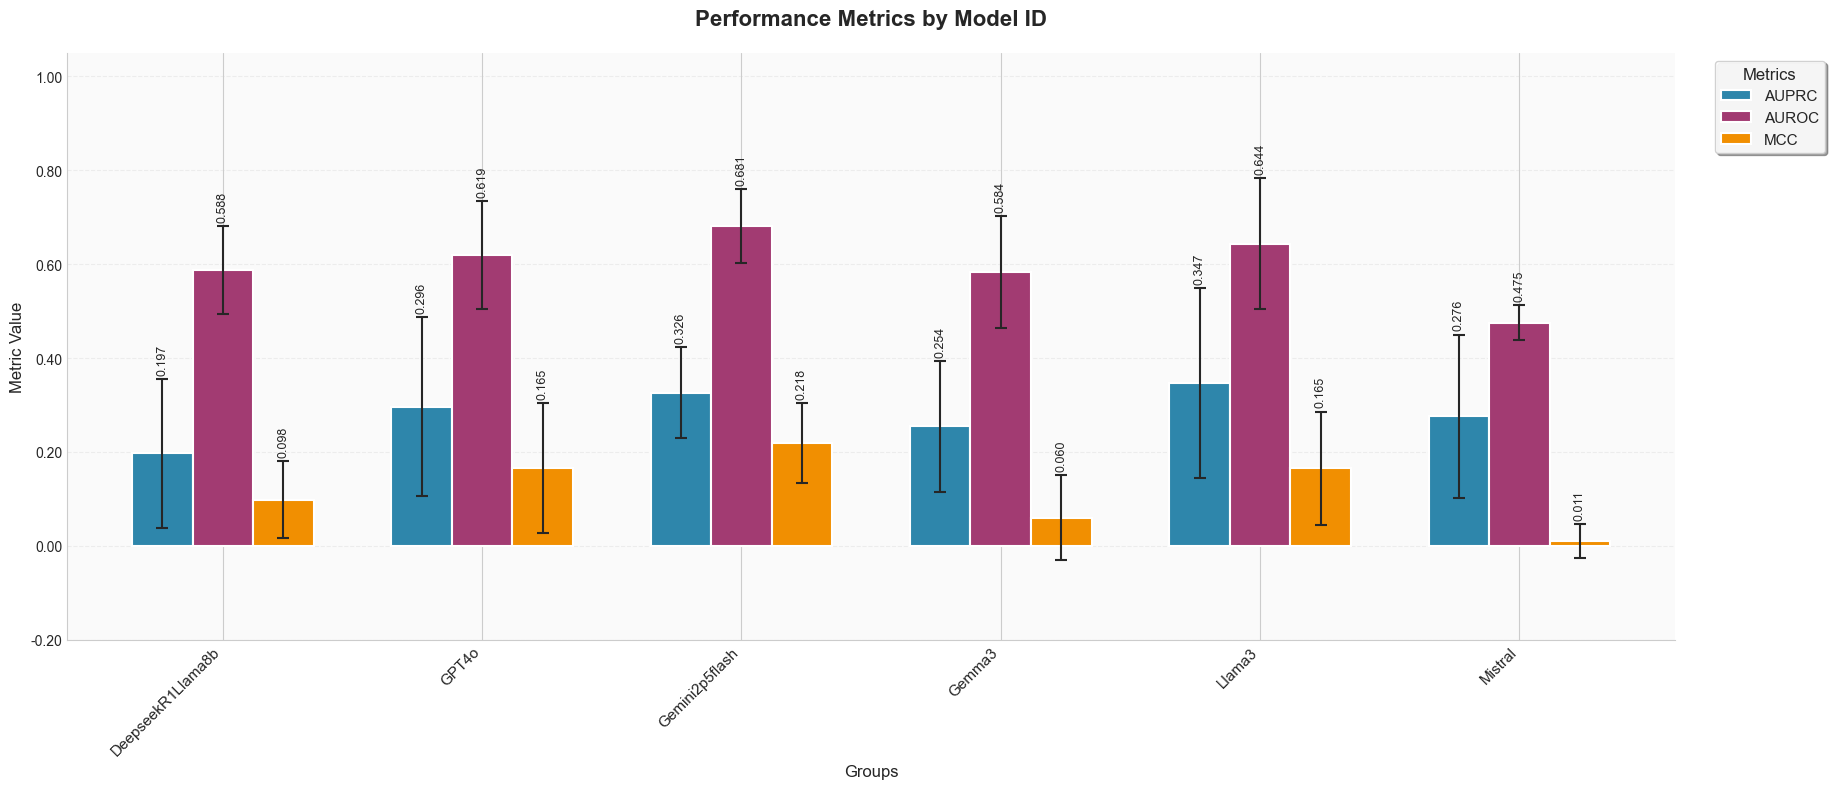

In [6]:
LLMAnalyzer.plot_metrics(df_all_metrics, group=['model_id'], title_prefix='')

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


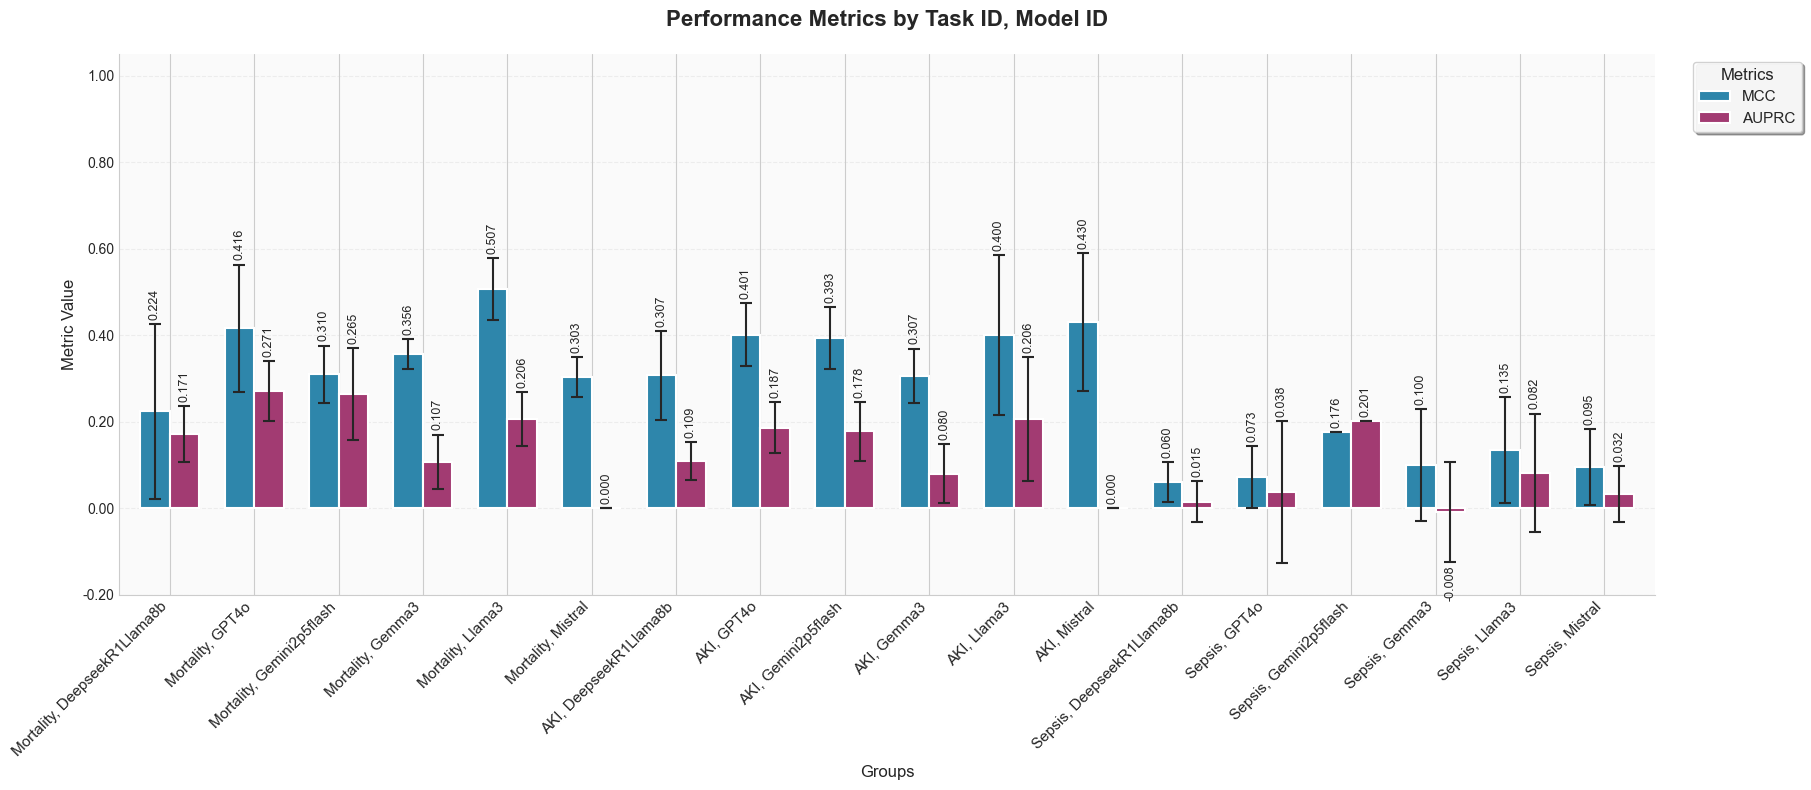

In [15]:
LLMAnalyzer.plot_metrics(
    df_all_metrics, group=["task_id", "model_id"], title_prefix="", metrics=["MCC", "AUPRC"]
)